In [14]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection

rng = np.random.default_rng(seed=0)

In [5]:
cos_list = [np.cos(x * 2 * np.pi / 5) for x in np.arange(5)]
sin_list = [np.sin(x * 2 * np.pi / 5) for x in np.arange(5)]

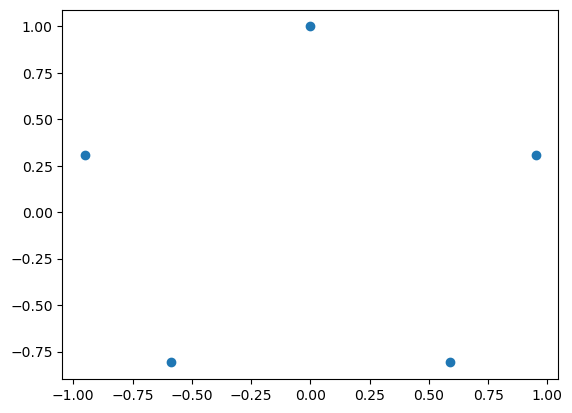

In [20]:
fig, ax = plt.subplots()
ax.scatter(sin_list, cos_list)
plt.show()

In [11]:
offsets = rng.uniform(size=5)
offsets = offsets / np.sum(offsets)

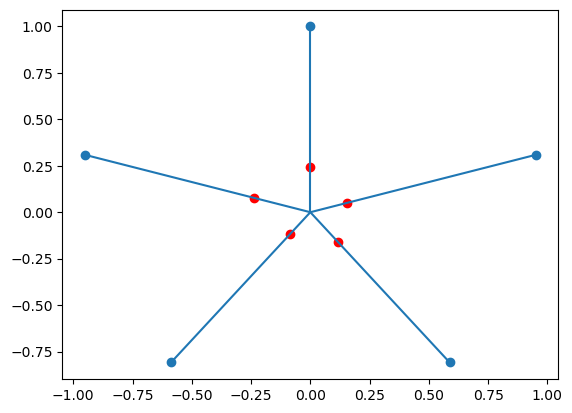

In [30]:
fig, ax = plt.subplots()
ax.scatter(sin_list, cos_list)

lines = [[(0, 0), (s, c)] for s, c in zip(sin_list, cos_list)]
ax.add_collection(LineCollection(lines))

ax.scatter(sin_list * offsets, cos_list * offsets, color='red')

plt.show()

In [16]:
slopes = [-(s/c) for c,s in zip(cos_list, sin_list)]
slopes

[-0.0,
 -3.077683537175253,
 0.7265425280053611,
 -0.7265425280053608,
 3.077683537175256]

In [31]:
lines

[[(0, 0), (0.0, 1.0)],
 [(0, 0), (0.9510565162951535, 0.30901699437494745)],
 [(0, 0), (0.5877852522924732, -0.8090169943749473)],
 [(0, 0), (-0.587785252292473, -0.8090169943749475)],
 [(0, 0), (-0.9510565162951536, 0.30901699437494723)]]

In [42]:
def determine_y(x, px, py, slope=None, default=0):
    if slope is None:
        return default
    else: 
        return slope*(x - px) + py

lines = []
for s, c, o, slope in zip(sin_list, cos_list, offsets, slopes):
    p1 = (-5, determine_y(-5, s*o, c*o, slope))
    p2 = (5, determine_y(5, s*o, c*o, slope))
    lines.append([p1, p2])

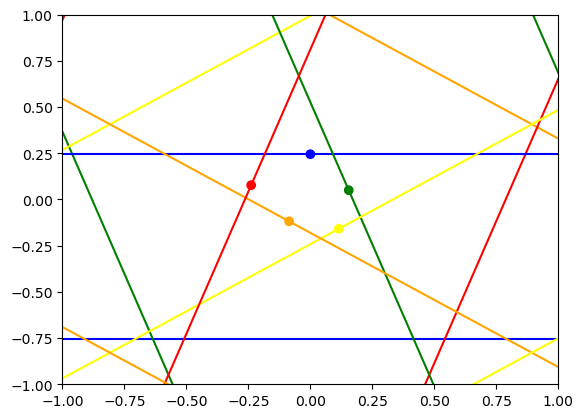

In [56]:
colors = ["blue", "green", "yellow", "orange", "red"]

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.scatter(sin_list * offsets, cos_list * offsets, color=colors)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.show()

In [52]:
lines = []
for x in np.arange(-5, 5):
    for s, c, o, slope in zip(sin_list, cos_list, offsets, slopes):
        p1 = (-5, determine_y(-5, s*(o+x), c*(o+x), slope))
        p2 = (5, determine_y(5, s*(o+x), c*(o+x), slope))
        lines.append([p1, p2])

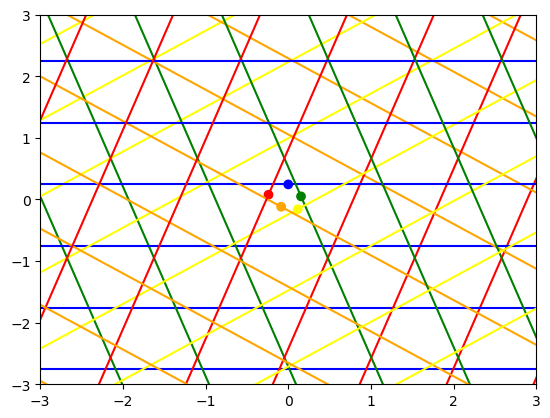

In [55]:
fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.scatter(sin_list * offsets, cos_list * offsets, color=colors)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
plt.show()